# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"
# LGMVIP March-22

# AUTHOR - NISHU KUMARI

## Advanced Level Task
### TASK-7- Develop A Neural Network That Can Read Handwriting :
Begin my neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners.

### Dataset link : https://en.wikipedia.org/wiki/MNIST_database

## Importing Libraries

In [1]:
#Importing packages
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Loading dataset

In [2]:
#loading dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 11s 1us/step


## Plotting count plot

C:\Users\Nishant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

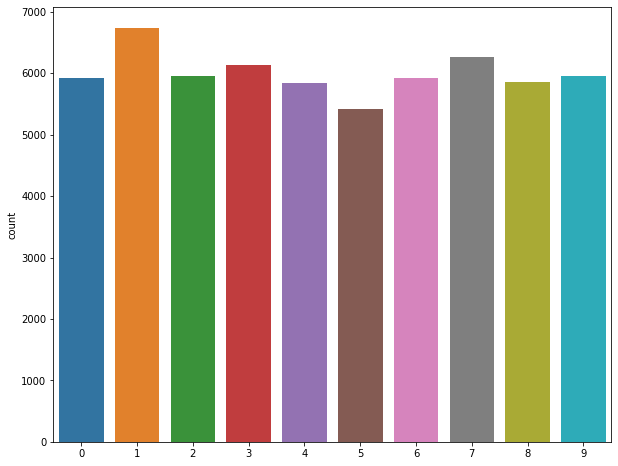

In [3]:
plt.figure(figsize = (10,8))
sns.countplot(y_train)

## Displaying some images

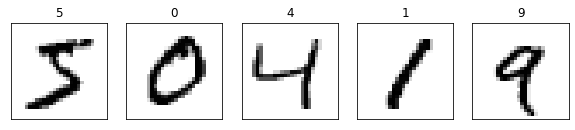

In [4]:
#Dataset properties
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

### Pre-processing the data

In [5]:
# Pre-processing the data
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [7]:
#applying normalization
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

## Creating the model
### Model Architecture
We will have to first build the model architecture and define it based on our dataset. We are going to add the following layers:

1. Conv2D - for the convolution layers
2. Dropout - to prevent overfitting
3. Dense - a fully connected layer
4. Softmax activation - This is used to convert all predictions into probability
The model architecture can be tuned to get optimal performance

so i am goimg to create a model with

#### CNN + Three layers + relu + (3,3) kernel_size + Dropout rate (0.3)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [9]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

## Training the model

In [18]:
# Train the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)


Epoch 1/10
1688/1688 [==============================] - 572s 321ms/step - loss: 0.2633 - accuracy: 0.9230 - val_loss: 0.0917 - val_accuracy: 0.9812
Epoch 2/10
1688/1688 [==============================] - 551s 326ms/step - loss: 0.1112 - accuracy: 0.9682 - val_loss: 0.0768 - val_accuracy: 0.9852
Epoch 3/10
1688/1688 [==============================] - 553s 328ms/step - loss: 0.0897 - accuracy: 0.9735 - val_loss: 0.1062 - val_accuracy: 0.9817
Epoch 4/10
1688/1688 [==============================] - 547s 324ms/step - loss: 0.0750 - accuracy: 0.9788 - val_loss: 0.0886 - val_accuracy: 0.9875
Epoch 5/10
1688/1688 [==============================] - 546s 323ms/step - loss: 0.0644 - accuracy: 0.9810 - val_loss: 0.1302 - val_accuracy: 0.9822
Epoch 6/10
1688/1688 [==============================] - 544s 322ms/step - loss: 0.0597 - accuracy: 0.9827 - val_loss: 0.1204 - val_accuracy: 0.9837
Epoch 7/10
1688/1688 [==============================] - 587s 348ms/step - loss: 0.0534 - accuracy: 0.9842 - val_

### Saving and loading the model

In [19]:
model.save('MNproject.h5')

In [20]:
from tensorflow.keras.models import load_model
model = load_model('MNproject.h5')

### Evaluating the model

In [21]:
# Evaluate the model
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 20s 62ms/step - loss: 2.5056 - accuracy: 0.9877
Test Loss 2.5055582523345947
Test Accuracy 0.9876999855041504


## Plotting Training & Validation plots

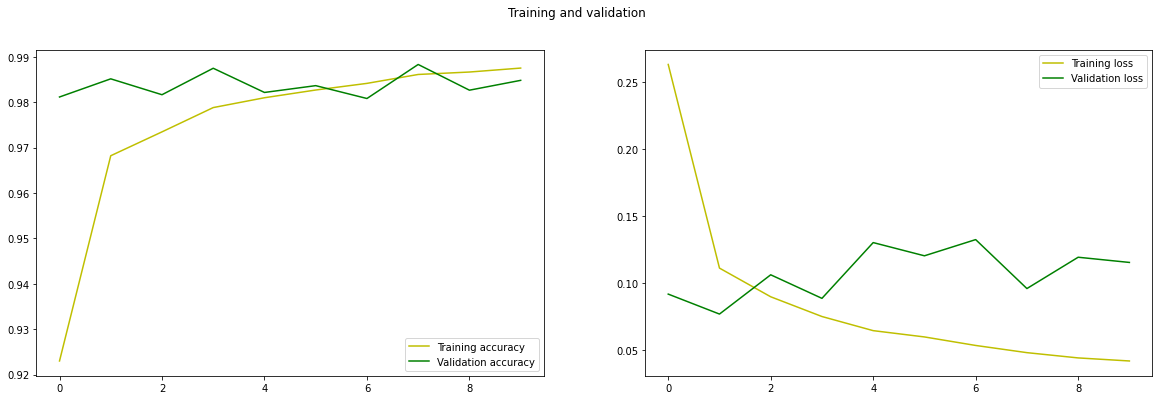

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [25]:
# Confusion Matrix
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    0,    0,    0,    0,    1,    1,    3,    3],
       [   4, 1117,    3,    2,    0,    1,    1,    1,    6,    0],
       [   0,    1, 1025,    0,    4,    0,    0,    0,    2,    0],
       [   0,    0,    4,  998,    0,    3,    0,    1,    4,    0],
       [   0,    0,    0,    0,  981,    0,    0,    0,    1,    0],
       [   2,    0,    1,    3,    0,  867,    2,    0,   14,    3],
       [   2,    2,    0,    0,    7,    2,  943,    0,    2,    0],
       [   0,    1,    9,    1,    0,    0,    0, 1014,    1,    2],
       [   0,    0,    1,    0,    0,    0,    0,    0,  972,    1],
       [   0,    0,    1,    0,   12,    1,    0,    2,    5,  988]])>

### Plotting heat map

Text(69.0, 0.5, 'Truth')

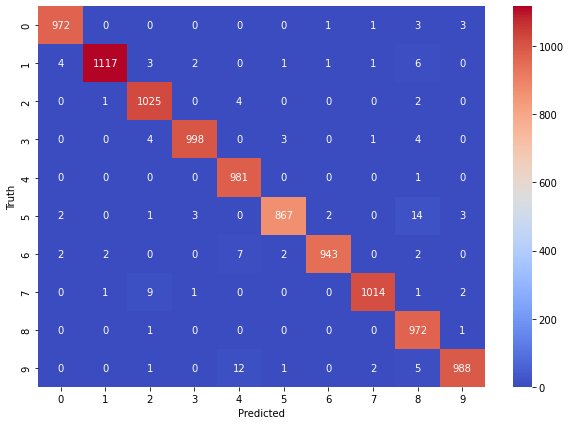

In [28]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Testing the Model

Predicted Value:  9
Successful prediction


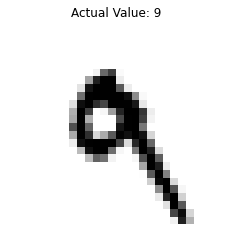

In [33]:
# Testing the Model
plt.imshow(x_test[7],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[7]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[7]))
if(y_test[7]==(np.argmax(prediction[7]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

Predicted Value:  2
Successful prediction


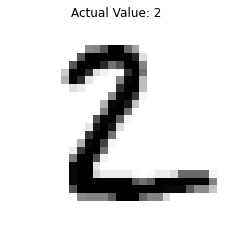

In [30]:
plt.imshow(x_test[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[1]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(y_test[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

# THANK YOU!!:))